In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
data = load_breast_cancer()
data.data.shape

(569, 30)

In [6]:
data.target

# 可以看到，乳腺癌数据集有569条记录，30个特征，单看维度虽然不算太高，但是样本量非常少。过拟合的情况可能存在。

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
rfc = RandomForestClassifier(n_estimators=100, random_state=90)
# 交叉验证的分类默认scoring='accuracy'
score_pre = cross_val_score(rfc, data.data, data.target, cv=10).mean()
score_pre
#这里可以看到，随机森林在乳腺癌数据上的表现本就还不错，在现实数据集上，基本上不可能什么都不调就看到95%以上的准确率

0.9648809523809524

0.9631265664160402 71


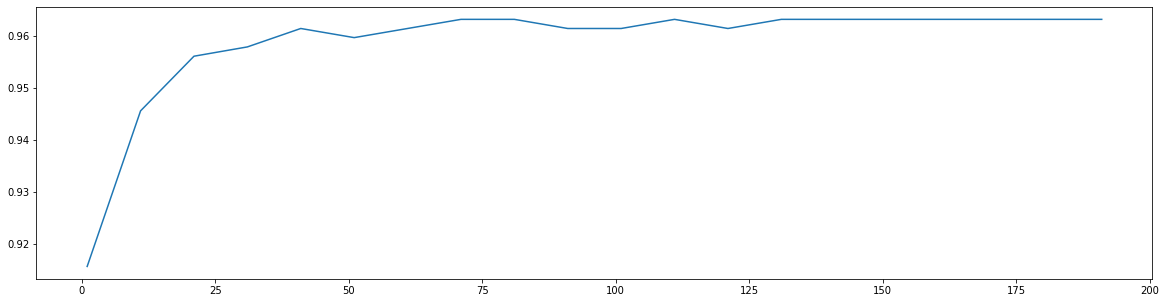

In [10]:
"""
在这里我们选择学习曲线，可以使用网格搜索吗？可以，但是只有学习曲线，才能看见趋势
我个人的倾向是，要看见n_estimators在什么取值开始变得平稳，是否一直推动模型整体准确率的上升等信息
第一次的学习曲线，可以先用来帮助我们划定范围，我们取每十个数作为一个阶段，来观察n_estimators的变化如何
引起模型整体准确率的变化
"""

#####【TIME WARNING: 30 seconds】#####
scorel = []
for i in range(0, 200, 10):
    rfc = RandomForestClassifier(n_estimators=i + 1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scorel.append(score)
print(max(scorel), (scorel.index(max(scorel)) * 10) + 1)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 201, 10), scorel)
plt.show()

0.9666353383458647 73


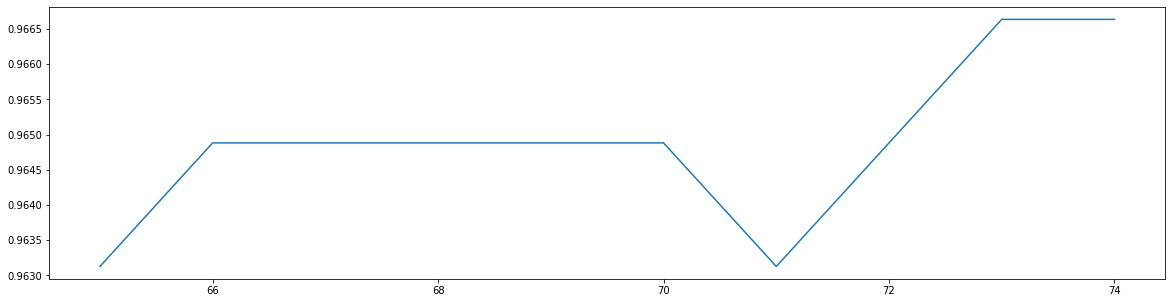

In [11]:
scorel = []
for i in range(65, 75):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scorel.append(score)
print(max(scorel), ([*range(65, 75)][scorel.index(max(scorel))]))
plt.figure(figsize=[20, 5])
plt.plot(range(65, 75), scorel)
plt.show()

In [12]:
"""
有一些参数是没有参照的，很难说清一个范围，这种情况下我们使用学习曲线，看趋势
从曲线跑出的结果中选取一个更小的区间，再跑曲线
param_grid = {'n_estimators':np.arange(0, 200, 10)}
 
param_grid = {'max_depth':np.arange(1, 20, 1)}
    
param_grid = {'max_leaf_nodes':np.arange(25,50,1)}
    对于大型数据集，可以尝试从1000来构建，先输入1000，每100个叶子一个区间，再逐渐缩小范围
 
有一些参数是可以找到一个范围的，或者说我们知道他们的取值和随着他们的取值，模型的整体准确率会如何变化，这
样的参数我们就可以直接跑网格搜索
param_grid = {'criterion':['gini', 'entropy']}
 
param_grid = {'min_samples_split':np.arange(2, 2+20, 1)}
 
param_grid = {'min_samples_leaf':np.arange(1, 1+10, 1)}
    
param_grid = {'max_features':np.arange(5,30,1)} 
 
"""

"\n有一些参数是没有参照的，很难说清一个范围，这种情况下我们使用学习曲线，看趋势\n从曲线跑出的结果中选取一个更小的区间，再跑曲线\nparam_grid = {'n_estimators':np.arange(0, 200, 10)}\n \nparam_grid = {'max_depth':np.arange(1, 20, 1)}\n    \nparam_grid = {'max_leaf_nodes':np.arange(25,50,1)}\n    对于大型数据集，可以尝试从1000来构建，先输入1000，每100个叶子一个区间，再逐渐缩小范围\n \n有一些参数是可以找到一个范围的，或者说我们知道他们的取值和随着他们的取值，模型的整体准确率会如何变化，这\n样的参数我们就可以直接跑网格搜索\nparam_grid = {'criterion':['gini', 'entropy']}\n \nparam_grid = {'min_samples_split':np.arange(2, 2+20, 1)}\n \nparam_grid = {'min_samples_leaf':np.arange(1, 1+10, 1)}\n    \nparam_grid = {'max_features':np.arange(5,30,1)} \n \n"

In [13]:
# 调整max_depth

param_grid = {'max_depth': np.arange(1, 20, 1)}

#   一般根据数据的大小来进行一个试探，乳腺癌数据很小，所以可以采用1~10，或者1~20这样的试探
#   但对于像digit recognition那样的大型数据来说，我们应该尝试30~50层深度（或许还不足够
#   更应该画出学习曲线，来观察深度对模型的影响

rfc = RandomForestClassifier(n_estimators=39, random_state=90
                             )
GS = GridSearchCV(rfc, param_grid, cv=10)  # 网格搜索
GS.fit(data.data, data.target)

GS.best_params_  # 显示调整出来的最佳参数

GS.best_score_  # 返回调整好的最佳参数对应的准确率

0.9666353383458647

In [14]:
GS.best_params_

{'max_depth': 8}

In [27]:
%%time
# 调整max_features

param_grid = {'max_features': np.arange(5, 30, 1)}

"""
 
max_features是唯一一个即能够将模型往左（低方差高偏差）推，也能够将模型往右（高方差低偏差）推的参数。我
们需要根据调参前，模型所在的位置（在泛化误差最低点的左边还是右边）来决定我们要将max_features往哪边调。
现在模型位于图像左侧，我们需要的是更高的复杂度，因此我们应该把max_features往更大的方向调整，可用的特征
越多，模型才会越复杂。max_features的默认最小值是sqrt(n_features)，因此我们使用这个值作为调参范围的
最小值。
 
"""

rfc = RandomForestClassifier(n_estimators=73,
                             max_depth=8,
                             random_state=90
                             )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GS.best_params_

GS.best_score_

CPU times: user 51.7 s, sys: 293 ms, total: 52 s
Wall time: 52.5 s


0.968421052631579

In [28]:
GS.best_params_

{'max_features': 22}

In [29]:
%%time
# 调整min_samples_leaf

param_grid = {'min_samples_leaf': np.arange(1, 1+10, 1)}

# 对于min_samples_split和min_samples_leaf,一般是从他们的最小值开始向上增加10或20
# 面对高维度高样本量数据，如果不放心，也可以直接+50，对于大型数据，可能需要200~300的范围
# 如果调整的时候发现准确率无论如何都上不来，那可以放心大胆调一个很大的数据，大力限制模型的复杂度

rfc = RandomForestClassifier(n_estimators=73,
                             max_depth=8,
                             max_features=22,
                             random_state=90
                             )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GS.best_params_

GS.best_score_

CPU times: user 22.3 s, sys: 119 ms, total: 22.4 s
Wall time: 22.5 s


0.968421052631579

In [32]:
GS.best_params_

{'min_samples_leaf': 1}

In [33]:
%%time
# 调整min_samples_split

param_grid = {'min_samples_split': np.arange(2, 2+20, 1)}

rfc = RandomForestClassifier(n_estimators=73,
                             max_depth=8,
                             max_features=22,
                             random_state=90
                             )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GS.best_params_

GS.best_score_

0.968421052631579

In [34]:
GS.best_params_

{'min_samples_split': 2}

In [35]:
%%time
# 调整Criterion

param_grid = {'criterion': ['gini', 'entropy']}

rfc = RandomForestClassifier(n_estimators=73,
                             max_depth=8,
                             max_features=22,
                             random_state=90
                             )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GS.best_params_

GS.best_score_

CPU times: user 5.09 s, sys: 14.8 ms, total: 5.1 s
Wall time: 5.11 s


0.968421052631579

In [36]:
GS.best_params_

{'criterion': 'gini'}

In [37]:
rfc = RandomForestClassifier(n_estimators=73,
                             max_depth=8,
                             max_features=22,
                             random_state=90)
score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score
 
score - score_pre

0.0035401002506265655